<div class="alert alert-primary">

Generate the network

1. Read the csv create the network and the links. New node is created if the movie doesn´t appear in the 250 movie

2. Clean the loops. Some movies have their own in related movies (second parts, etc...)

3. Add atributes but the synopsis with the txt.

</div>

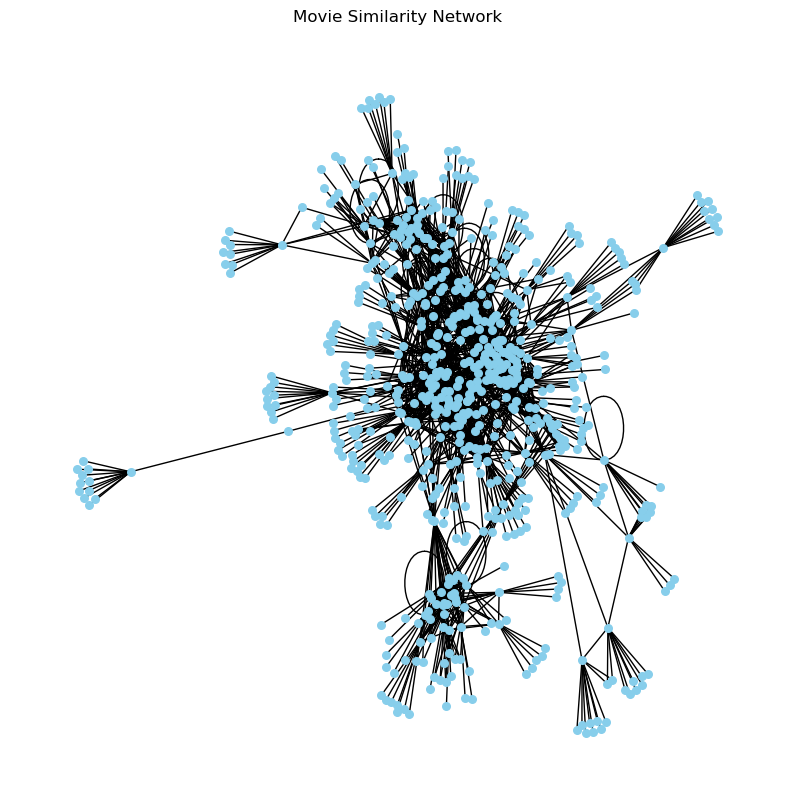

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'C:/Users/nerea/Documents/MasterDTU/SocialGraphs_fall24/Projects/socialGraphs_fall24/FinalProject/csv/top_movie_data_with_similar.csv'  # Replace with the actual file path


df = pd.read_csv(file_path)

# Create an empty undirected graph
G = nx.Graph()

# Add nodes and edges based on the similarity list
for index, row in df.iterrows():
    film = row['Name']
    similar_films = row['Similar Movies'].split(', ')  # Splitting the similar films into a list
    
    # Add the film as a node (it will be added automatically when creating edges)
    G.add_node(film)
    
    # Add edges between the film and its similar films
    for similar_film in similar_films:
        G.add_edge(film, similar_film)

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=False, node_size=30, node_color='skyblue', font_size=10)
plt.title("Movie Similarity Network")
plt.axis('off')
plt.show()


In [16]:
# print num of nodes and edges
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 650
Number of edges: 2445


In [17]:
# Find all self-loops in the graph
self_loops = list(nx.selfloop_edges(G))

# Delete all self-loops
for edge in self_loops:
    G.remove_edge(edge[0], edge[1])


In [18]:
# print num of nodes and edges
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 650
Number of edges: 2422


In [22]:
import os

# Folder containing the text files
metadata_folder = 'C:/Users/nerea/Documents/MasterDTU/SocialGraphs_fall24/Projects/socialGraphs_fall24/net_movies_info/net_movies_info'

# Function to parse a metadata text file and exclude the "Synopsis" field
def parse_metadata(file_path):
    metadata = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        key = None
        for line in lines:
            line = line.strip()
            if line.endswith(':'):
                key = line[:-1]  # Remove the colon
                if key == 'Synopsis':  # Skip "Synopsis"
                    key = None
                else:
                    metadata[key] = ''
            elif key:  # Append the value to the current key
                metadata[key] += (' ' + line if metadata[key] else line)
    return metadata

# Add metadata to the nodes in the graph, excluding 'Synopsis'
for node in G.nodes():
    metadata_file = os.path.join(metadata_folder, f"{node}.txt")
    if os.path.exists(metadata_file):
        metadata = parse_metadata(metadata_file)
        nx.set_node_attributes(G, {node: metadata})

# Example: Check attributes of a specific node
sample_node = '3 Idiots'  # Replace with a movie title in your dataset
if sample_node in G.nodes:
    # Print the metadata of the node in one line each
    for key, value in G.nodes[sample_node].items():
        print(f"{key}: {value}")



Title: 3 Idiots 
Rating: 8.4 
Top 250 Rank: 86 
Duration: 170 
Release Date: 09 Nov 2009 (Germany) 
Genres: Comedy, Drama 
Director: Rajkumar Hirani 
Actors: Aamir Khan, Madhavan, Sharman Joshi, Kareena Kapoor, Boman Irani, Omi Vaidya, Mona Singh, Jaaved Jaaferi, Parikshit Sahni, Olivier Lafont 
Languages: Hindi, English 
Description: Rancho is an engineering student. His two friends. Farhan and Raju, Rancho sees the world in a different way. Rancho goes somewhere one day. And his friends find him. When Rancho is found, he has become one of a great scientist in the world. 
Plot: ['Two friends are searching for their long lost companion. They revisit their college days and recall the memories of their friend who inspired them to think differently, even as the rest of the world called them "idiots".', 'Rancho is an engineering student. His two friends. Farhan and Raju, Rancho sees the world in a different way. Rancho goes somewhere one day. And his friends find him. When Rancho is found,

<div class="alert alert-primary">

Calculate and print the IN-degree distribution and the OUT-degree distribution

1. Create the Directed Graph.
2. Analyze the In-Degree and the movies with more links in
3. Analyze the Out-Degree and the move with more out-degree


</div>

We need to read the graph as a Directed graph in order to calculate the IN-degree and the Out-degree.

- IN-DEGREE: the number of directed edges coming into that node. How many movies have that node as a related or similar movies.

- OUT-DEGREE: the number of directed edges going out from thaat node.

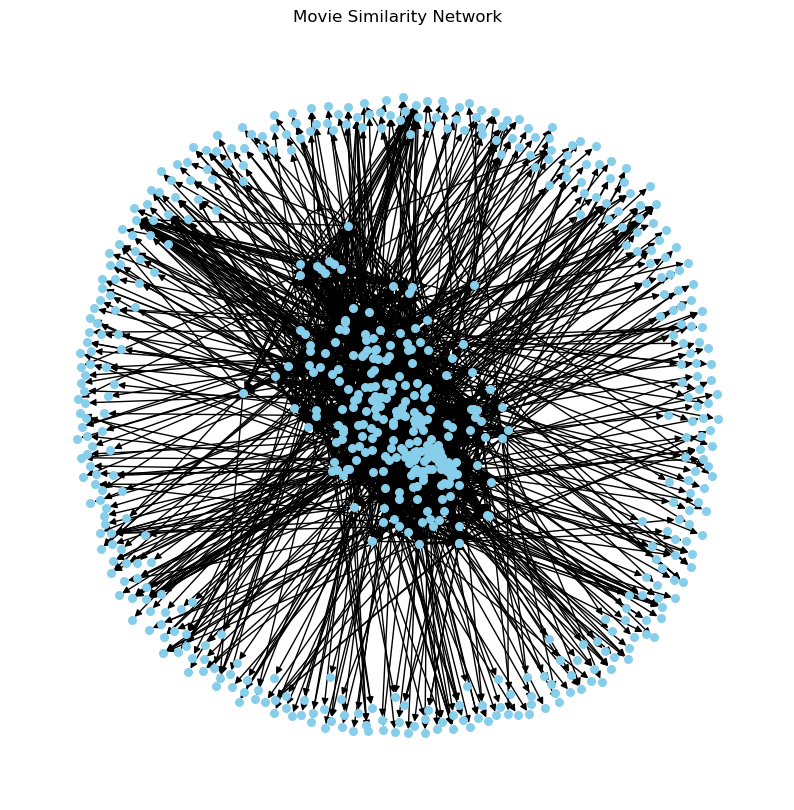

In [30]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'C:/Users/nerea/Documents/MasterDTU/SocialGraphs_fall24/Projects/socialGraphs_fall24/FinalProject/csv/top_movie_data_with_similar.csv'  # Replace with the actual file path


df = pd.read_csv(file_path)

# Create an empty undirected graph
D = nx.DiGraph()

# Add nodes and edges based on the similarity list
for index, row in df.iterrows():
    film = row['Name']
    similar_films = row['Similar Movies'].split(', ')  # Splitting the similar films into a list
    
    # Add the film as a node (it will be added automatically when creating edges)
    D.add_node(film)
    
    # Add edges between the film and its similar films
    for similar_film in similar_films:
        D.add_edge(film, similar_film)

# Find all self-loops in the graph
self_loops = list(nx.selfloop_edges(G))

# Delete all self-loops
for edge in self_loops:
    D.remove_edge(edge[0], edge[1])

# Add metadata to the nodes in the graph, excluding 'Synopsis'
# Add metadata to the nodes in the graph, excluding 'Synopsis'
for node in D.nodes():
    metadata_file = os.path.join(metadata_folder, f"{node}.txt")
    if os.path.exists(metadata_file):
        metadata = parse_metadata(metadata_file)
        nx.set_node_attributes(D, {node: metadata})

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx(D, with_labels=False, node_size=30, node_color='skyblue', font_size=10)
plt.title("Movie Similarity Network")
plt.axis('off')
plt.show()


Text(0, 0.5, 'Frequency')

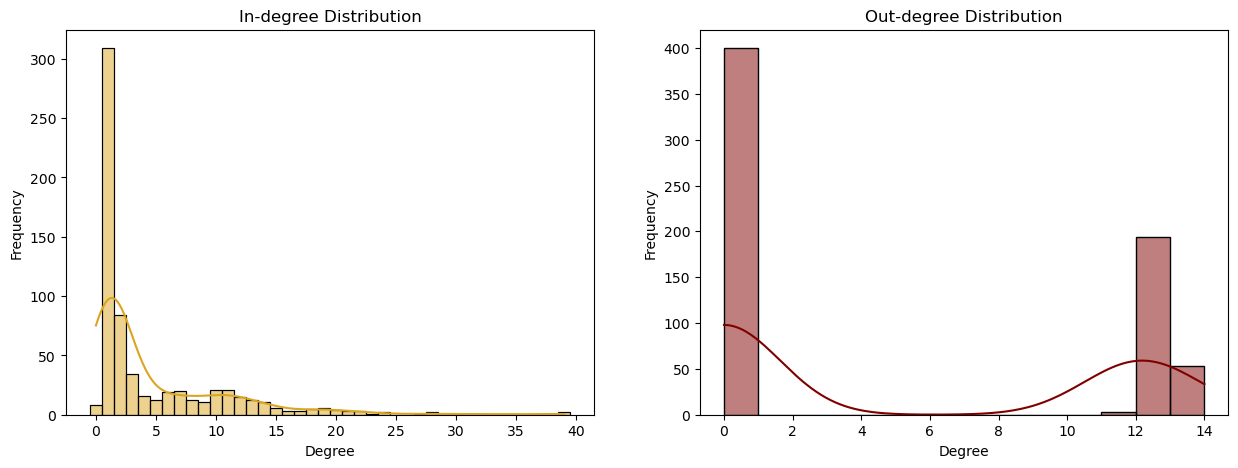

In [44]:
# Get the in-degree and out-degree for each node
in_degrees = [d for n, d in D.in_degree()]
out_degrees = [d for n, d in D.out_degree()]

# plot in and out degree distribution with seaborn
import seaborn as sns

# Create a pandas Series from the degree lists
in_degree_series = pd.Series(in_degrees)
out_degree_series = pd.Series(out_degrees)

# Plot histograms in separate plots same figure with seaborn
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Define bin width and range
binwidth = 1
binrange = (min(in_degrees) - 0.5, max(in_degrees) + 0.5)


# Plot the in-degree distribution as a histogram in the first subplot
sns.histplot(in_degree_series, color='goldenrod', kde=True, ax=ax1, binwidth=binwidth, binrange=binrange)
ax1.set_title("In-degree Distribution")
ax1.set_xlabel("Degree")
ax1.set_ylabel("Frequency")

# Plot the out-degree distribution as a histogram in the second subplot
sns.histplot(out_degree_series, color='maroon', kde=True, ax=ax2, binwidth=binwidth)
ax2.set_title("Out-degree Distribution")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Frequency")

**PROMBLEM**: Every time that a new movie appears in any related movie (and is not in the 250 list) we add a new node. Since we never look for the related movies of that specific node, they only have 1 node comming in and no node going out.

Thats why in the In-degree distribution we have a lot of nodes with only 1 or 2 edges pointing at them, suggesting that a big part of the 650 are in the network because they are mentioned only once.

The same happens in the out-degree, we have a lot of nodes with 0 edges existing from that node. Thats why we have 400 nodes that do not appear on the list, so they dont have related movies to point to.

Text(0, 0.5, 'Frequency')

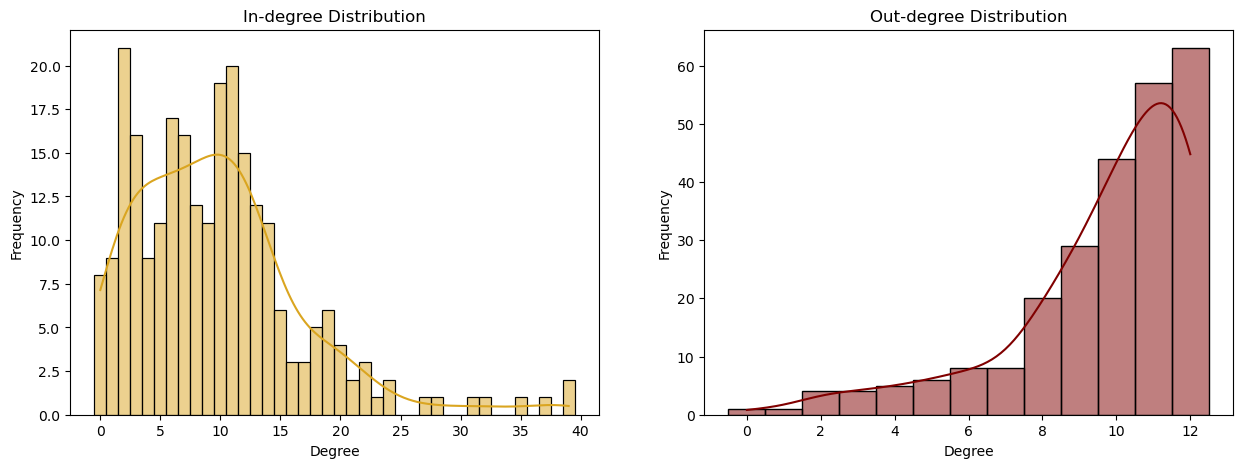

In [45]:
# make a copy of the graph
H = D.copy()

# Remove the nodes with out-degree = 0
nodes_to_remove = [node for node, out_degree in dict(H.out_degree()).items() if out_degree == 0]
H.remove_nodes_from(nodes_to_remove)

# plot the in-degree and out-degree distribution of the new graph with this change
# Get the in-degree and out-degree for each node
in_degrees = [d for n, d in H.in_degree()]
out_degrees = [d for n, d in H.out_degree()]

# Create a pandas Series from the degree lists
in_degree_series = pd.Series(in_degrees)
out_degree_series = pd.Series(out_degrees)

# Plot histograms in separate plots same figure with seaborn
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Define bin width and range
binwidth = 1
binrange = (min(in_degrees) - 0.5, max(in_degrees) + 0.5)

# Plot the in-degree distribution as a histogram in the first subplot
sns.histplot(in_degree_series, color='goldenrod', kde=True, ax=ax1, binwidth=binwidth, binrange=binrange)
ax1.set_title("In-degree Distribution")
ax1.set_xlabel("Degree")
ax1.set_ylabel("Frequency")

# Define bin range for out-degrees
binrange = (min(out_degrees) - 0.5, max(out_degrees) + 0.5)

# Plot the out-degree distribution as a histogram in the second subplot
sns.histplot(out_degree_series, color='maroon', kde=True, ax=ax2, binwidth=binwidth, binrange=binrange)
ax2.set_title("Out-degree Distribution")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Frequency")



If we do the same analysis removing all the nodes that have 0 out-degree we can see that everything change.

The distribution is slightly right-skewed, meaning some movies are very popular and are listed as "related" by many others. The highest frequency lies in the mid-range of the in-degree values, suggesting that most movies are referenced as "related" by a moderate number of other films. Outliers on the high end (e.g., in-degrees of 30+) could indicate highly influential or broadly relatable movies.

High in-degree nodes (movies) act as hubs—they're referenced as related by many others. Examples might include culturally significant or widely influential films.


The out-degree distribution is sharply skewed toward smaller values, showing most movies link to only a few related films.
The peak at higher out-degrees suggests a maximum limit (e.g., 12), which could correspond to a predefined cap on how many "related movies" IMDb lists per film.

High out-degree nodes might represent movies that link to many others, perhaps because they belong to genres with multiple closely connected films (e.g., franchises).


In [36]:
# Top 10 nodes with highest in-degree with its genre and rating
in_degrees = dict(H.in_degree())
top_10_indegree = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes with highest in-degree:")
for node, indegree in top_10_indegree:
    print(f"{node} (In-degree: {indegree})")
    print(f"    Genres: {H.nodes[node].get('Genres')}")
    print(f"    Rating: {H.nodes[node].get('Rating')}")


Top 10 nodes with highest in-degree:
Forrest Gump (In-degree: 39)
    Genres: Drama, Romance 
    Rating: 8.8 
Inception (In-degree: 39)
    Genres: Action, Adventure, Sci-Fi, Thriller 
    Rating: 8.8 
Fight Club (In-degree: 37)
    Genres: Drama 
    Rating: 8.8 
Se7en (In-degree: 35)
    Genres: Crime, Drama, Mystery, Thriller 
    Rating: 8.6 
Pulp Fiction (In-degree: 32)
    Genres: Crime, Drama 
    Rating: 8.9 
The Wolf of Wall Street (In-degree: 31)
    Genres: Biography, Comedy, Crime, Drama 
    Rating: 8.2 
Shutter Island (In-degree: 28)
    Genres: Drama, Mystery, Thriller 
    Rating: 8.2 
The Dark Knight (In-degree: 27)
    Genres: Action, Crime, Drama, Thriller 
    Rating: 9.0 
Catch Me If You Can (In-degree: 24)
    Genres: Biography, Crime, Drama 
    Rating: 8.1 
A Beautiful Mind (In-degree: 24)
    Genres: Biography, Drama, Mystery 
    Rating: 8.2 


Drama is the dominant genre among these movies. This suggests that dramas are central to the IMDb network of top-rated films, potentially because they appeal to a broad audience or resonate deeply with viewers.

Other popular genres include Crime, Thriller, and Biography, often representing films with complex, gripping narratives that leave a lasting cultural impact.

Many of these movies are associated with renowned directors (e.g., Christopher Nolan for Inception and The Dark Knight; Quentin Tarantino for Pulp Fiction) or feature iconic performances by celebrated actors. This reinforces their status as pivotal films in the IMDb network.

Movies with broad genre appeal (like Inception, blending action, sci-fi, and thriller elements) are more likely to connect to a wide variety of other films. This versatility likely explains their frequent appearance in the "related movies" lists.

In [46]:
# Top 10 nodes with highest out-degree with its genre and rating
out_degrees = dict(H.out_degree())
top_10_outdegree = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes with highest out-degree:")
for node, outdegree in top_10_outdegree:
    print(f"{node} (Out-degree: {outdegree})")
    print(f"    Genres: {H.nodes[node].get('Genres')}")
    print(f"    Rating: {H.nodes[node].get('Rating')}")

Top 10 nodes with highest out-degree:
The Shawshank Redemption (Out-degree: 12)
    Genres: Drama 
    Rating: 9.3 
The Dark Knight (Out-degree: 12)
    Genres: Action, Crime, Drama, Thriller 
    Rating: 9.0 
Forrest Gump (Out-degree: 12)
    Genres: Drama, Romance 
    Rating: 8.8 
Saving Private Ryan (Out-degree: 12)
    Genres: Drama, War 
    Rating: 8.6 
Fight Club (Out-degree: 12)
    Genres: Drama 
    Rating: 8.8 
Inception (Out-degree: 12)
    Genres: Action, Adventure, Sci-Fi, Thriller 
    Rating: 8.8 
Pulp Fiction (Out-degree: 12)
    Genres: Crime, Drama 
    Rating: 8.9 
Interstellar (Out-degree: 12)
    Genres: Adventure, Drama, Sci-Fi 
    Rating: 8.7 
Se7en (Out-degree: 12)
    Genres: Crime, Drama, Mystery, Thriller 
    Rating: 8.6 
The Green Mile (Out-degree: 12)
    Genres: Crime, Drama, Fantasy, Mystery 
    Rating: 8.6 


It has no sense doing the out degree because the maximum related movies are 12

<div class="alert alert-primary">

Calculate the communities and some metrics for the communities

1. Create a partition based on genre
2. Create a partition based on director
3. Create partition using Louvian method
4. Calculate modularity for all of them
5. Calculate the confusion matrix


</div>